In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

In [29]:
df=pd.read_csv("train.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
df.shape

(1460, 81)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [32]:
df.isnull().mean().sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64

In [33]:
df.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [35]:
df.shape

(1460, 77)

In [36]:
df.drop(["LowQualFinSF","3SsnPorch","ScreenPorch","PoolArea","MiscVal"],axis=1,inplace=True)

In [37]:
df.drop("Id",axis=1,inplace=True)

In [38]:
df.shape

(1460, 71)

In [39]:
datatype_group=df.columns.to_series().groupby(df.dtypes).groups
datatype_group

{dtype('int64'): Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC'

In [40]:
glist=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [41]:
for cat in glist:
  print(cat,df[cat].value_counts(),sep="\n")
  print("\n\n")

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64



Street
Pave    1454
Grvl       6
Name: Street, dtype: int64



LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64



LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64



Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64



LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64



LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64



Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPk

In [42]:
df.drop(["Street","Utilities"],axis=1,inplace=True)

In [43]:
df.shape

(1460, 69)

In [44]:
df["LotFrontage"].fillna(df["LotFrontage"].median(),inplace=True)
df["BsmtQual"].fillna(df["BsmtQual"].mode()[0],inplace=True)
df["BsmtCond"].fillna(df["BsmtCond"].mode()[0],inplace=True)
df["Electrical"].fillna(df["Electrical"].mode()[0],inplace=True)
df["GarageType"].fillna(df["GarageType"].mode()[0],inplace=True)
df["GarageFinish"].fillna(df["GarageFinish"].mode()[0],inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(),inplace=True)
#df["Fence"].fillna(df["Fence"].mode()[0],inplace=True)
df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0],inplace=True)
df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0],inplace=True)
df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0],inplace=True)

In [45]:
df.isnull().sum().sort_values(ascending=False).head(10)

FireplaceQu    690
GarageCond      81
GarageQual      81
MasVnrType       8
MasVnrArea       8
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
SalePrice        0
dtype: int64

In [46]:
df["GarageCond"].fillna(df["GarageCond"].mode()[0],inplace=True)
df["GarageQual"].fillna(df["GarageQual"].mode()[0],inplace=True)
df["MasVnrType"].fillna(df["MasVnrType"].mode()[0],inplace=True)
df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0],inplace=True)



In [47]:
df.isnull().sum().sort_values(ascending=False).head(10)

MasVnrArea     8
SalePrice      0
ExterCond      0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
ExterQual      0
Foundation     0
BsmtUnfSF      0
dtype: int64

In [48]:
len(glist)

39

In [49]:
datatype_group=df.columns.to_series().groupby(df.dtypes).groups
datatype_group

{dtype('int64'): Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
        'CentralAir', 'Electr

In [50]:
glist=['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'PavedDrive', 'SaleType', 'SaleCondition']
len(glist)

37

In [51]:
for cat in glist:
  df[cat] = df[cat].astype("category")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   LotShape       1460 non-null   category
 5   LandContour    1460 non-null   category
 6   LotConfig      1460 non-null   category
 7   LandSlope      1460 non-null   category
 8   Neighborhood   1460 non-null   category
 9   Condition1     1460 non-null   category
 10  Condition2     1460 non-null   category
 11  BldgType       1460 non-null   category
 12  HouseStyle     1460 non-null   category
 13  OverallQual    1460 non-null   int64   
 14  OverallCond    1460 non-null   int64   
 15  YearBuilt      1460 non-null   int64   
 16  YearRemodAdd   1460 non-null   int64   
 17  RoofStyle      1460 non-null   ca

In [ ]:
#df["MasVnrArea"].fillna("0",inplace=True)


In [53]:
df["MasVnrArea"].isnull().sum()

8

In [54]:
df["MasVnrArea"]=df["MasVnrArea"].astype(str)
df["MasVnrArea"]=np.where(df["MasVnrArea"]=="nan","-1",df["MasVnrArea"])
df["MasVnrArea"]= pd.to_numeric(df['MasVnrArea'])

In [55]:
df["MasVnrArea"]=np.where(df["MasVnrArea"]==-1,df["MasVnrArea"].median(),df["MasVnrArea"])

In [56]:
df.isnull().sum().sort_values(ascending=False).head(10)

SalePrice      0
ExterCond      0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
MasVnrArea     0
ExterQual      0
Foundation     0
BsmtUnfSF      0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   LotShape       1460 non-null   category
 5   LandContour    1460 non-null   category
 6   LotConfig      1460 non-null   category
 7   LandSlope      1460 non-null   category
 8   Neighborhood   1460 non-null   category
 9   Condition1     1460 non-null   category
 10  Condition2     1460 non-null   category
 11  BldgType       1460 non-null   category
 12  HouseStyle     1460 non-null   category
 13  OverallQual    1460 non-null   int64   
 14  OverallCond    1460 non-null   int64   
 15  YearBuilt      1460 non-null   int64   
 16  YearRemodAdd   1460 non-null   int64   
 17  RoofStyle      1460 non-null   ca

In [ ]:
df = pd.get_dummies(columns=["PavedDrive","GarageFinish","CentralAir","LandSlope"], data=df, drop_first=True)

In [ ]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PavedDrive_P,PavedDrive_Y,GarageFinish_RFn,GarageFinish_Unf,CentralAir_Y,LandSlope_Mod,LandSlope_Sev
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,2,548,TA,TA,0,61,0,2,2008,WD,Normal,208500,0,1,1,0,1,0,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,2,460,TA,TA,298,0,0,5,2007,WD,Normal,181500,0,1,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,2,608,TA,TA,0,42,0,9,2008,WD,Normal,223500,0,1,1,0,1,0,0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,3,642,TA,TA,0,35,272,2,2006,WD,Abnorml,140000,0,1,0,1,1,0,0
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,3,836,TA,TA,192,84,0,12,2008,WD,Normal,250000,0,1,1,0,1,0,0


In [ ]:
for cat in glist:
  if cat not in ["PavedDrive","GarageFinish","CentralAir","LandSlope"]:
    df[cat]=df[cat].cat.codes

In [ ]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PavedDrive_P,PavedDrive_Y,GarageFinish_RFn,GarageFinish_Unf,CentralAir_Y,LandSlope_Mod,LandSlope_Sev
0,60,3,65.0,8450,3,3,4,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,4,856,854,1710,1,0,2,1,3,1,2,8,6,0,2,1,2003.0,2,548,4,4,0,61,0,2,2008,8,4,208500,0,1,1,0,1,0,0
1,20,3,80.0,9600,3,3,2,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,4,1262,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,2,460,4,4,298,0,0,5,2007,8,4,181500,0,1,1,0,1,0,0
2,60,3,68.0,11250,0,3,4,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,4,920,866,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,2,608,4,4,0,42,0,9,2008,8,4,223500,0,1,1,0,1,0,0
3,70,3,60.0,9550,0,3,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,4,961,756,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,642,4,4,0,35,272,2,2006,8,0,140000,0,1,0,1,1,0,0
4,60,3,84.0,14260,0,3,2,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,4,1145,1053,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,3,836,4,4,192,84,0,12,2008,8,4,250000,0,1,1,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   int8   
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   LotShape          1460 non-null   int8   
 5   LandContour       1460 non-null   int8   
 6   LotConfig         1460 non-null   int8   
 7   Neighborhood      1460 non-null   int8   
 8   Condition1        1460 non-null   int8   
 9   Condition2        1460 non-null   int8   
 10  BldgType          1460 non-null   int8   
 11  HouseStyle        1460 non-null   int8   
 12  OverallQual       1460 non-null   int64  
 13  OverallCond       1460 non-null   int64  
 14  YearBuilt         1460 non-null   int64  
 15  YearRemodAdd      1460 non-null   int64  
 16  RoofStyle         1460 non-null   int8   


In [ ]:
df.shape

(1460, 72)

In [ ]:
allcol = df.columns.to_list()

In [ ]:
print(allcol)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'PavedDrive_P', 'PavedDrive_Y', 'GarageFinish_RFn', 'GarageFinish_Unf', 'CentralAir_Y', 'LandSlop

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


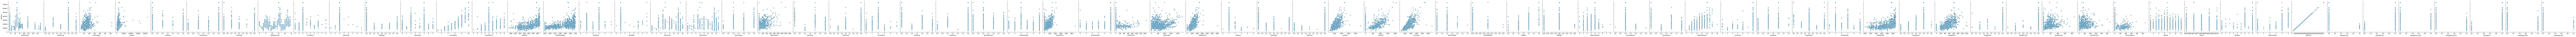

In [ ]:
%matplotlib inline
sns.pairplot(data=df,x_vars=allcol,y_vars='SalePrice',size=4)

In [ ]:
df.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PavedDrive_P,PavedDrive_Y,GarageFinish_RFn,GarageFinish_Unf,CentralAir_Y,LandSlope_Mod,LandSlope_Sev
MSSubClass,1.000000,0.035900,-0.356718,-0.139781,0.119289,-0.002940,0.075910,-0.005985,-0.024762,-0.042395,0.746063,0.397161,0.032628,-0.059316,0.027850,0.040581,-0.117817,-0.031336,-0.089159,-0.137229,-0.029850,0.023573,-0.017161,-0.003254,0.058126,-0.041065,-0.013652,-0.064221,0.016599,-0.069836,0.041195,-0.065649,-0.140759,-0.238518,0.048009,0.020760,0.051945,-0.251758,0.307886,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.010129,0.040380,0.003711,-0.045569,0.033443,0.090719,0.081396,-0.040110,-0.098672,0.007630,0.002927,-0.012579,-0.006100,-0.012037,-0.013585,-0.021407,0.012464,-0.024940,-0.084284,-0.025338,-0.047611,-0.045044,0.030458,-0.101774,-0.018716,-0.017184
MSZoning,0.035900,1.000000,-0.105961,-0.034452,0.061887,-0.017854,-0.009895,-0.249679,-0.027874,0.044606,0.005690,-0.105315,-0.160099,0.186951,-0.308908,-0.174728,-0.000301,0.005133,-0.008558,0.006963,-0.028279,-0.062830,0.200536,-0.096041,-0.235174,0.128245,-0.010528,0.037209,0.024688,-0.049128,-0.031718,0.028086,-0.046749,-0.087834,0.056866,0.134279,-0.070818,-0.055614,-0.051481,-0.082615,-0.018526,0.007193,-0.198290,-0.133876,-0.016471,0.049434,0.128976,-0.043200,-0.095722,-0.011349,-0.009943,0.116007,-0.263772,-0.157042,-0.189250,-0.150802,-0.083272,-0.009477,-0.154704,0.115509,-0.031496,-0.020628,0.097437,0.009494,-0.166872,0.069822,-0.108734,-0.160563,0.209102,-0.049523,-0.025597,-0.004316
LotFrontage,-0.356718,-0.105961,1.000000,0.304522,-0.138877,-0.076080,-0.177821,0.084901,-0.009341,0.002599,-0.408013,0.030567,0.234812,-0.053281,0.116685,0.083348,0.153999,0.081277,0.075455,0.099515,-0.017693,0.178469,-0.184120,0.048300,0.098418,-0.169603,0.050604,-0.123629,-0.023263,0.214367,-0.025981,0.042463,0.124098,0.363472,-0.020325,-0.081081,0.059572,0.413773,0.072388,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,-0.190232,0.320518,0.030114,0.233221,0.056479,-0.216403,0.062996,0.269539,0.323511,0.049935,0.042740,0.075542,0.137014,0.010287,0.010451,0.006380,-0.031412,0.058857,0.334771,-0.012478,0.082858,0.127112,-0.229379,0.067350,0.069202,0.020453
LotArea,-0.139781,-0.034452,0.304522,1.000000,-0.165315,-0.149083,-0.121161,0.044569,0.023846,0.022164,-0.205721,-0.033190,0.105806,-0.005636,0.014228,0.013788,0.077054,0.149837,0.004256,-0.003930,-0.008122,0.103321,-0.057275,0.015160,-0.011081,-0.065150,0.012366,-0.141043,-0.061880,0.214103,-0.068954,0.111170,-0.002618,0.260833,0.028158,0.004212,0.043856,0.299475,0.050986,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,-0.057018,0.190015,-0.022317,0.271364,0.069154,-0.116799,-0.025865,0.154871,0.180403,0.017551,0.028106,0.171698,0.084774,-0.018340,0.001205,-0.014261,0.012292,0.034169,0.263843,0.012568,0.010431,0.014502,-0.101163,0.049755,0.092649,0.540380
LotShape,0.119289,0.061887,-0.138877,-0.165315,1.000000,0.085434,0.221102,-0.038894,-0.115003,-0.043768,0.116262,-0.104026,-0.190497,0.013693,-0.226062,-0.153825,0.003182,-0.071174,-0.020463,-0.027951,0.007946,-0.106178,0.148818,-0.029497,-0.135124,0.161208,-0.012226,0.140506,0.090615,-0.134033,0.026349,-0.039738,-0.021666,-0.175782,0.075894,0.096248,-0.097017,-0.172613,-0.060205,-0.175093,-0.076178,-0.026824,-0.159390,

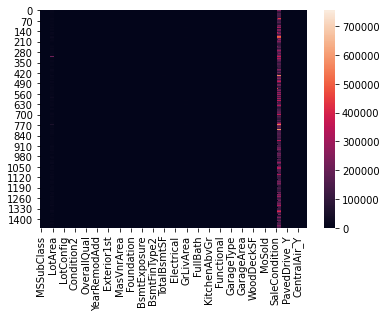

In [ ]:
sns.heatmap(data=df)

In [ ]:
allcol.remove("SalePrice")
print(allcol)
y=df["SalePrice"]

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'PavedDrive_P', 'PavedDrive_Y', 'GarageFinish_RFn', 'GarageFinish_Unf', 'CentralAir_Y', 'LandSlope_Mod', 'Land

In [ ]:
x=df[allcol]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
x_train.shape

(1168, 71)

In [ ]:
y_train.shape

(1168,)